In [23]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras import Sequential, Model
from tensorflow.keras.utils import plot_model

# **With Top Layer**

In [3]:
# Load the full model

vgg16_model = VGG16(include_top=True,
                    weights='imagenet',
                    input_shape=(224, 224, 3))


553467096/553467096 [==============================] - 20s 0us/step


In [9]:
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

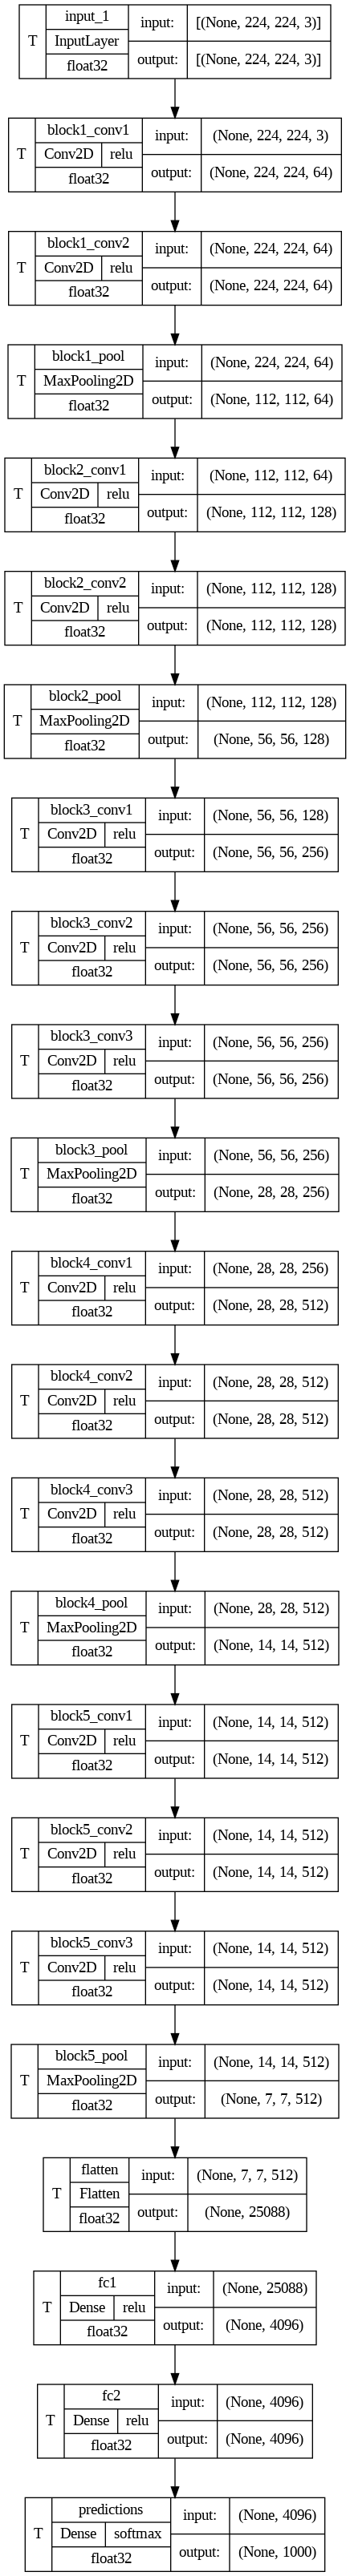

In [4]:
# Plot the model
# All the parameters

plot_model(model=vgg16_model,
           #to_file='model.png',
           show_shapes=True,
           show_dtype=True,
           show_layer_names=True,
           rankdir='TB',
           expand_nested=True,
           dpi=96,
           layer_range=None,
           show_layer_activations=True,
           show_trainable=True)

In [5]:
# All the layers of vgg16

for layer in vgg16_model.layers:
    print(layer.name)

input_1
block1_conv1
block1_conv2
block1_pool
block2_conv1
block2_conv2
block2_pool
block3_conv1
block3_conv2
block3_conv3
block3_pool
block4_conv1
block4_conv2
block4_conv3
block4_pool
block5_conv1
block5_conv2
block5_conv3
block5_pool
flatten
fc1
fc2
predictions


In [7]:
# Show all the class name of vgg16 model

for layer in vgg16_model.layers:
    print(layer.__class__.__name__)

InputLayer
Conv2D
Conv2D
MaxPooling2D
Conv2D
Conv2D
MaxPooling2D
Conv2D
Conv2D
Conv2D
MaxPooling2D
Conv2D
Conv2D
Conv2D
MaxPooling2D
Conv2D
Conv2D
Conv2D
MaxPooling2D
Flatten
Dense
Dense
Dense


# **Without Top layer**

In [8]:
# Remove the last fully connected layer
# It will remove till last flatten layer

vgg16_model2 = VGG16(include_top=False,
                    weights='imagenet',
                    input_shape=(224, 224, 3))

58889256/58889256 [==============================] - 3s 0us/step


In [11]:
vgg16_model2.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

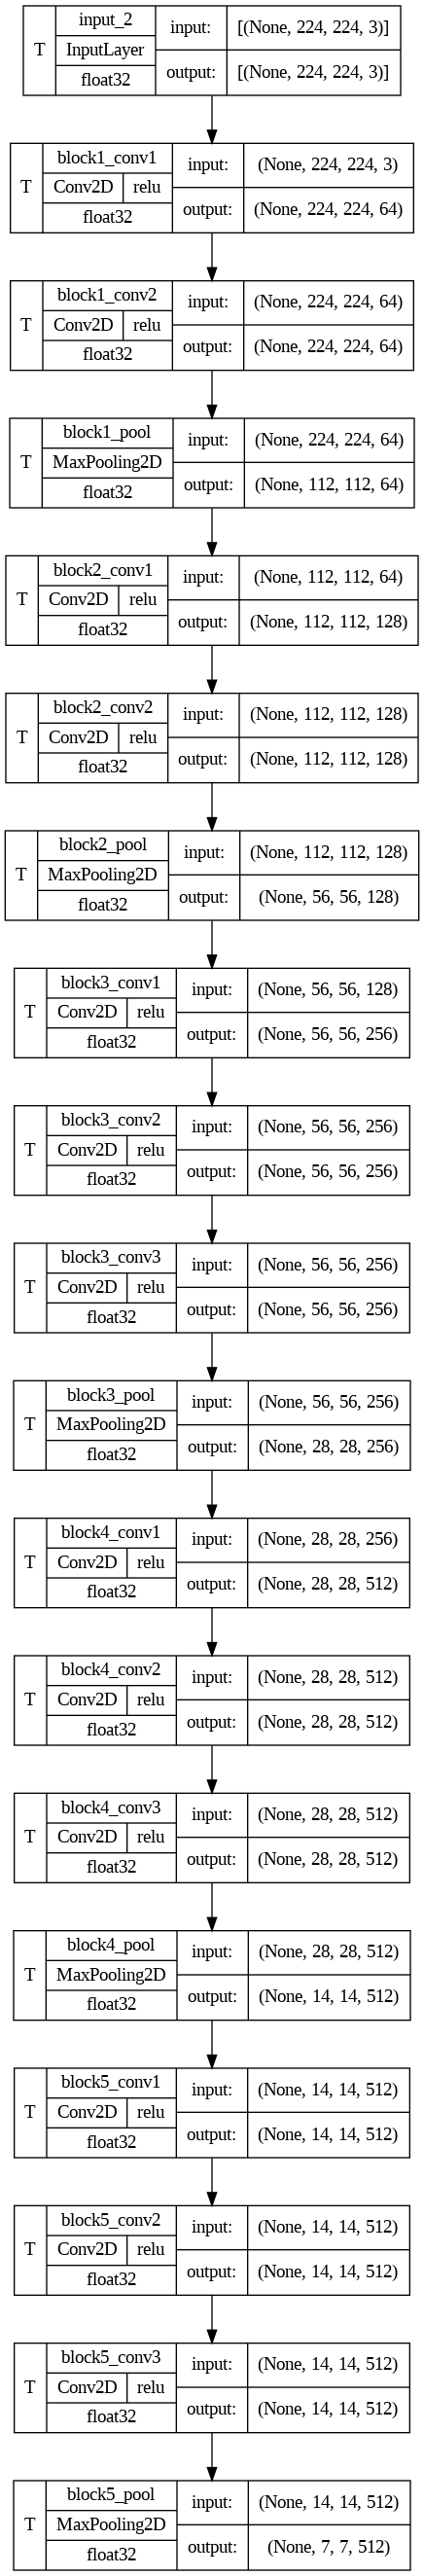

In [10]:
# Plot the model
# All the parameters

plot_model(model=vgg16_model2,
           #to_file='model.png',
           show_shapes=True,
           show_dtype=True,
           show_layer_names=True,
           rankdir='TB',
           expand_nested=True,
           dpi=96,
           layer_range=None,
           show_layer_activations=True,
           show_trainable=True)

In [13]:
# All the layers of vgg16

for layer in vgg16_model2.layers:
    print(layer.name)

print("#" * 30)

# Show all the class name of vgg16 model

for layer in vgg16_model2.layers:
    print(layer.__class__.__name__)

input_2
block1_conv1
block1_conv2
block1_pool
block2_conv1
block2_conv2
block2_pool
block3_conv1
block3_conv2
block3_conv3
block3_pool
block4_conv1
block4_conv2
block4_conv3
block4_pool
block5_conv1
block5_conv2
block5_conv3
block5_pool
##############################
InputLayer
Conv2D
Conv2D
MaxPooling2D
Conv2D
Conv2D
MaxPooling2D
Conv2D
Conv2D
Conv2D
MaxPooling2D
Conv2D
Conv2D
Conv2D
MaxPooling2D
Conv2D
Conv2D
Conv2D
MaxPooling2D


In [15]:
# Set the weights value freeze

vgg16_model2.trainable = False

In [ ]:
# Freeze the trained layers
# You can also do it like this way

# for layer in vgg16_model2.layers:
#     layer.trainable = False

In [16]:
# Now check summary

vgg16_model2.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

# **Add New Layers**

In [17]:
# One way

model = Sequential()

model.add(layer=vgg16_model2)
model.add(layer=Flatten())
model.add(layer=Dense(units=256, activation='relu'))
model.add(layer=Dense(units=128, activation='relu'))
# Add prediction or target layer, let our target class is 4
model.add(layer=Dense(units=4, activation='softmax'))

In [18]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 256)               6422784   
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 4)                 516       
                                                                 
Total params: 21,170,884
Trainable params: 6,456,196
Non-trainable params: 14,714,688
_________________________________________________________________


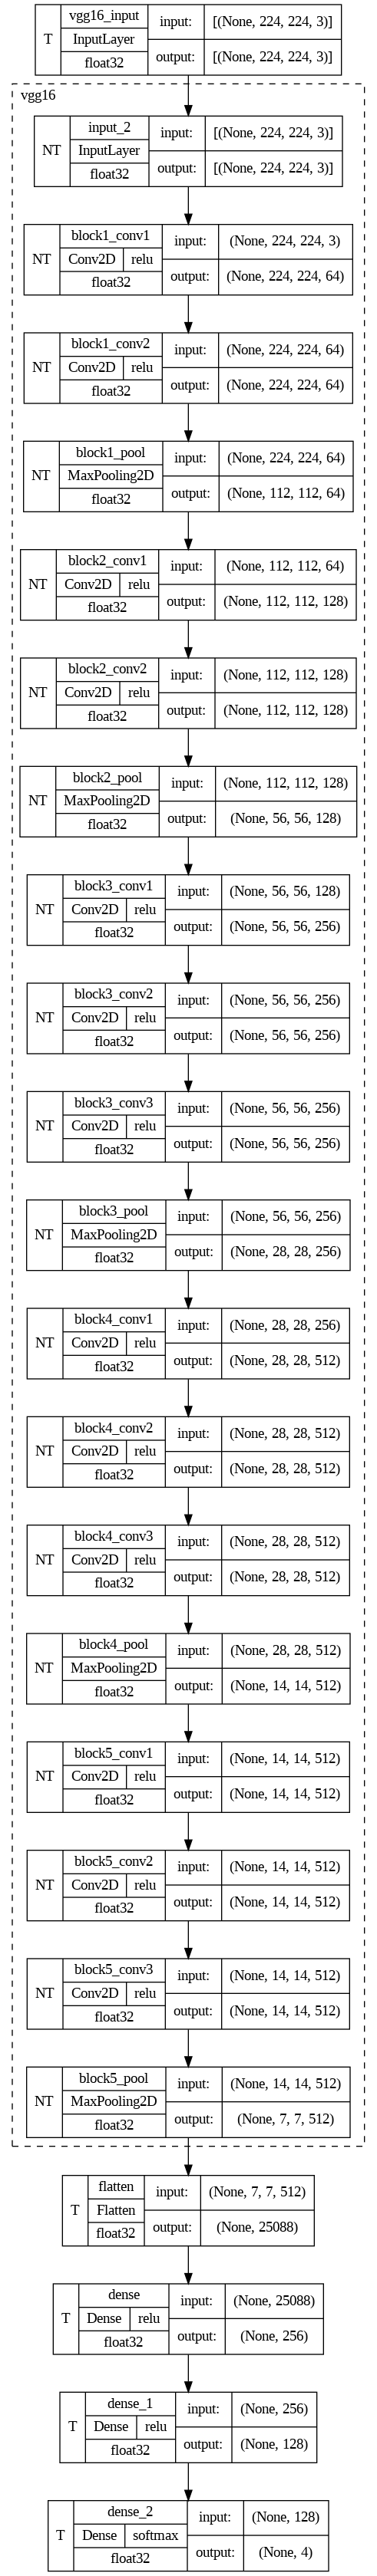

In [19]:
# Plot the model
# All the parameters

plot_model(model=model,
           #to_file='model.png',
           show_shapes=True,
           show_dtype=True,
           show_layer_names=True,
           rankdir='TB',
           expand_nested=True,
           dpi=96,
           layer_range=None,
           show_layer_activations=True,
           show_trainable=True)

In [20]:
# All the layers of vgg16

for layer in model.layers:
    print(layer.name)

print("#" * 30)

# Show all the class name of vgg16 model

for layer in model.layers:
    print(layer.__class__.__name__)

vgg16
flatten
dense
dense_1
dense_2
##############################
Functional
Flatten
Dense
Dense
Dense


In [21]:
for layer in model.layers:
    print(layer.name, layer.trainable)

vgg16 False
flatten True
dense True
dense_1 True
dense_2 True


In [24]:
# Another way

vgg16_model3 = VGG16(include_top=False,
                    weights='imagenet',
                    input_shape=(224, 224, 3))

# Freeze the trained layers
for layer in vgg16_model3.layers:
    layer.trainable = False

vgg_feedforward = Flatten()(vgg16_model3.output)
vgg_feedforward = Dense(units=512,activation ='relu')(vgg_feedforward)
vgg_feedforward = Dense(units=256,activation ='relu')(vgg_feedforward)
# Here, units=4 means our target class is 4
prediction = Dense(units=4, activation='softmax')(vgg_feedforward)

model_vgg16 = Model(inputs=vgg16_model3.input, outputs=prediction)


# learning_rate=0.001, beta_1=0.9, beta_2=0.999 # default value

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.869, beta_2=0.995)

# model_vgg16.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=metrics)

model_vgg16.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

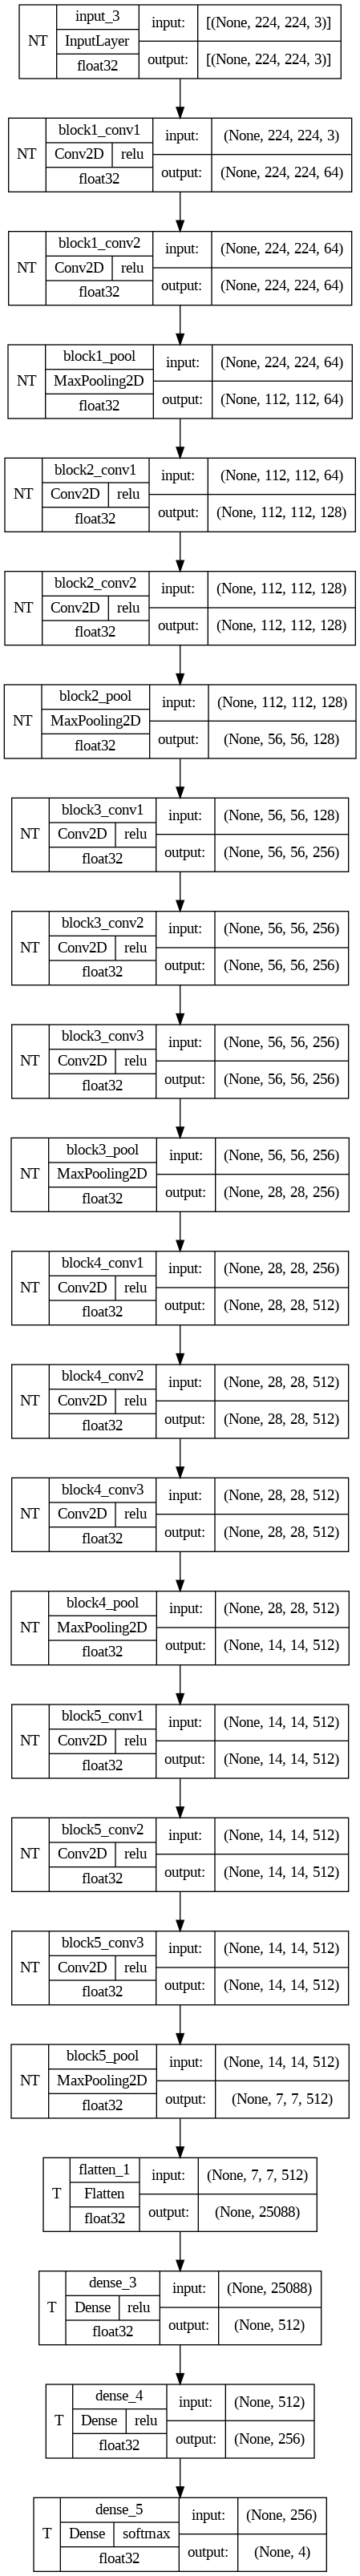

In [27]:
# Plot the model
# All the parameters

plot_model(model=model_vgg16,
           #to_file='model.png',
           show_shapes=True,
           show_dtype=True,
           show_layer_names=True,
           rankdir='TB',
           expand_nested=True,
           dpi=96,
           layer_range=None,
           show_layer_activations=True,
           show_trainable=True)

In [26]:
# All the layers of vgg16

for layer in model_vgg16.layers:
    print(layer.name)

print("#" * 30)

# Show all the class name of vgg16 model

for layer in model_vgg16.layers:
    print(layer.__class__.__name__)

input_3
block1_conv1
block1_conv2
block1_pool
block2_conv1
block2_conv2
block2_pool
block3_conv1
block3_conv2
block3_conv3
block3_pool
block4_conv1
block4_conv2
block4_conv3
block4_pool
block5_conv1
block5_conv2
block5_conv3
block5_pool
flatten_1
dense_3
dense_4
dense_5
##############################
InputLayer
Conv2D
Conv2D
MaxPooling2D
Conv2D
Conv2D
MaxPooling2D
Conv2D
Conv2D
Conv2D
MaxPooling2D
Conv2D
Conv2D
Conv2D
MaxPooling2D
Conv2D
Conv2D
Conv2D
MaxPooling2D
Flatten
Dense
Dense
Dense


In [28]:
# Check which layers are trainable

for layer in model_vgg16.layers:
  print(layer.name, layer.trainable)

input_3 False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 False
block5_conv2 False
block5_conv3 False
block5_pool False
flatten_1 True
dense_3 True
dense_4 True
dense_5 True


## **Now we will try to train also block5-conv1 layer**

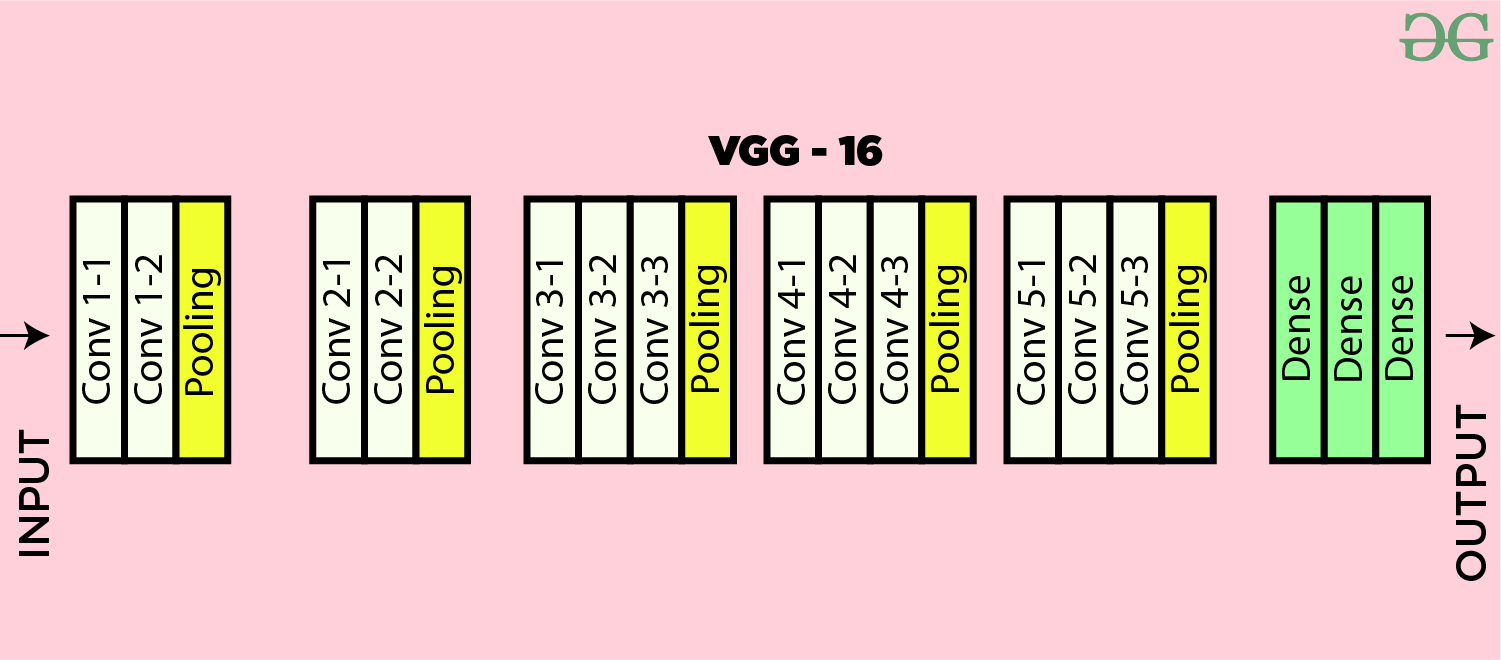

In [29]:
# Another way

vgg16_model4 = VGG16(include_top=False,
                    weights='imagenet',
                    input_shape=(224, 224, 3))


vgg16_model4.trainable = True

set_trainable = False

for layer in vgg16_model4.layers:
  if layer.name == 'block5_conv1':
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False

for layer in vgg16_model4.layers:
  print(layer.name, layer.trainable)

input_4 False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 True
block5_conv2 True
block5_conv3 True
block5_pool True


In [ ]:
# Now you can Add new layer that I done above code.